In [1]:
### Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

salaries_csv_path = "Data/Salaries.csv"
fielding_csv_path = "Data/Fielding.csv"
batting_csv_path = "Data/Batting.csv"

#read CSV files in Dataframes and merge data
salaries_df =  pd.read_csv(salaries_csv_path)
fielding_df = pd.read_csv(fielding_csv_path)
batting_df = pd.read_csv(batting_csv_path)

In [52]:
batting_df.columns
pitchers_batting = batting_df[['playerID','yearID','AB','H']]
pitchers_batting = pd.DataFrame(pitchers_batting)
pitchers_batting['Batting Average'] = pitchers_batting['H']/pitchers_batting['AB']
pitchers_batting2 = pitchers_batting.merge(fielding_df,on='playerID')
pitchers_batting2 = pitchers_batting2[['playerID','yearID_x','Batting Average','POS']]
pitchers_batting2 = pitchers_batting2.rename(columns={'yearID_x':'yearID'})
pitchers_batting3 = pitchers_batting2.loc[pitchers_batting2['POS']=='P']
working = pitchers_batting3.groupby(['yearID','POS'])
summary_table3 = working.mean()['Batting Average']
final = pd.DataFrame(summary_table3)
final = final.droplevel(level = 1)
final = final.rename(columns={'Batting Average':'Pitchers BA'})
final.head()



,Pitchers BA
yearID,
1871,0.270362
1872,0.263292
1873,0.261780
1874,0.255634
1875,0.226296


In [55]:
position_players = pitchers_batting2.loc[pitchers_batting2['POS']!= 'P']
position_players = position_players.drop(columns='POS')
working2 = position_players.groupby(['yearID'])
summary_table4 = working2.mean()['Batting Average']
final2 = pd.DataFrame(summary_table4)
final2 = final2.rename(columns={'Batting Average':'Position Players BA'})
final2.head()

,Position Players BA
yearID,
1871,0.283734
1872,0.296845
1873,0.293307
1874,0.271136
1875,0.246442


In [45]:
new_df = new_df.rename(columns = {'Batting Average':'Pitchers Batting Average'})
new_df2= new_df2.rename(columns = {'Batting Average':'Position Players Batting Average'})
df3 = new_df.join(new_df2,how='outer')
df3['Difference'] = df3['Position Players Batting Average'] - df3['Pitchers Batting Average']
average_difference = df3['Difference'].mean()
average_difference = type(average_difference

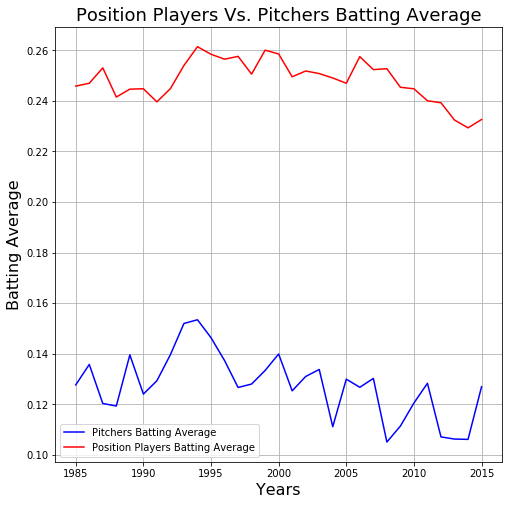

Since 1985, MLB position players have a batting average 0.1207 higher than Pitchers.


In [63]:
new_df = final.loc[1985:2015,:]
new_df2 = final2.loc[1985:2015,:]
x_axis = new_df.index
data = new_df['Pitchers BA']
data2 = new_df2['Position Players BA']
fig,ax = plt.subplots(figsize = (8,8))
pitcher = ax.plot(x_axis,data,label = 'Pitchers Batting Average',color = 'b')
positions = ax.plot(x_axis,data2,label = 'Position Players Batting Average',color = 'r')
ax.grid()
ax.set_title('Position Players Vs. Pitchers Batting Average',size = 18)
ax.set_xlabel('Years',size = 16)
ax.set_ylabel('Batting Average',size = 16)
ax.legend(loc='best')
plt.savefig('Batting_Average.png')
plt.show()
print(f'Since 1985, MLB position players have a batting average {average_difference:.4g} higher than Pitchers.')